In [1]:
%matplotlib inline

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp
from celluloid import Camera
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
palette = sns.color_palette('pastel')
mpl.style.use('../sample.mplstyle')
blue = sns.xkcd_rgb['light navy blue']

## Discrete Distributions

### Poisson

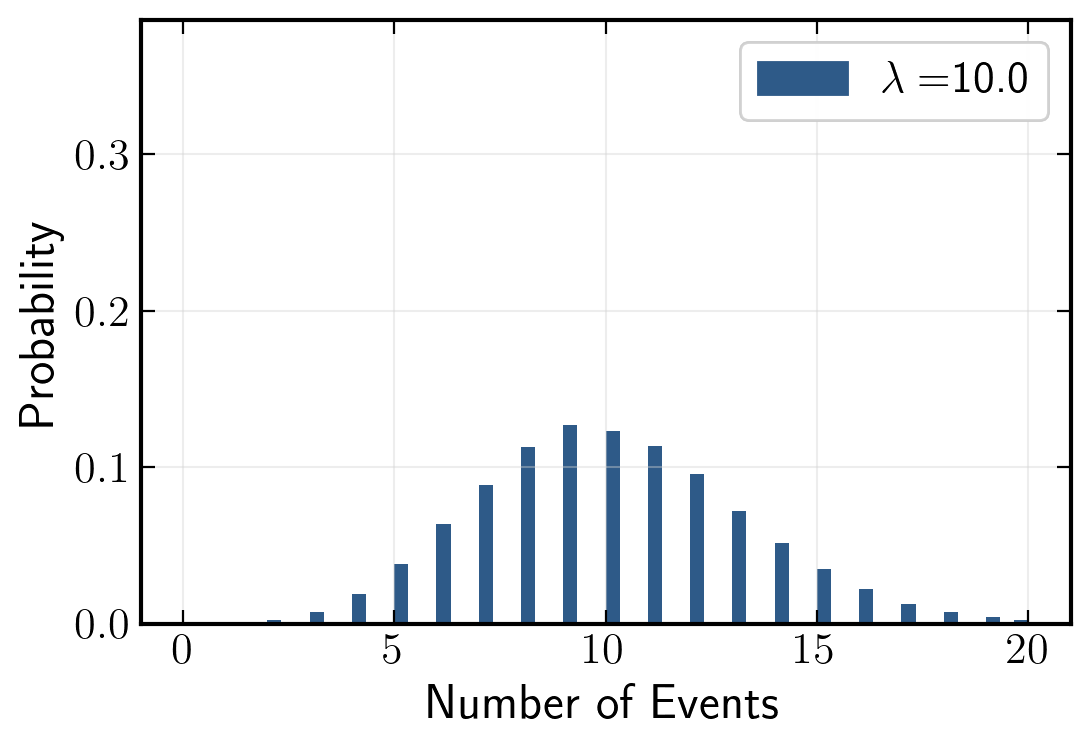

In [24]:
fig = plt.figure()
camera = Camera(fig)
bins = np.linspace(0., 20., 61)
for lam in [1., 3., 5., 10.]:
    data = np.random.poisson(lam=lam, size=100000)
    plt.hist(data, bins = bins, 
             weights = np.ones_like(data) / data.size,
            color = blue)
    plt.ylabel('Probability')
    plt.xlabel('Number of Events')
    custom_lab = [Patch(color=blue, label = r'$\lambda = $' + str(lam))]
    plt.legend(handles=custom_lab)
    camera.snap()
    
animation = camera.animate(blit=True)
animation.save('/home/apizzuto/public_html/animations/poisson_distribution.gif', 
               writer = 'imagemagick', fps=0.4, )
plt.show()

### Gaussian

In [ ]:
sp.special.

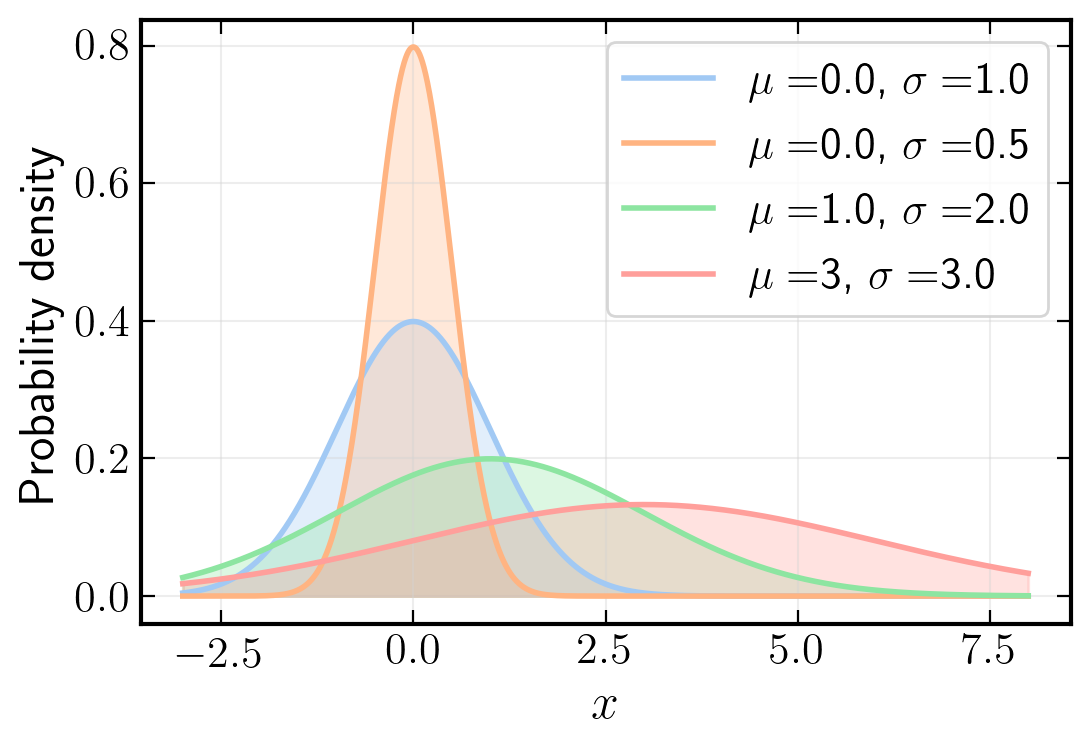

In [30]:
mus = [0., 0., 1., 3]
sigmas = [1., 0.5, 2., 3.]
xs = np.linspace(-3., 8., 5000)
fig = plt.figure()
for i, (mu, sigma) in enumerate(zip(mus, sigmas)):
    pdf = sp.stats.norm.pdf(xs, mu, sigma)
    plt.plot(xs, pdf, color = palette[i], lw=2, 
             label=r'$\mu = $' + str(mu) + r', $\sigma = $' + str(sigma))
    plt.fill_between(xs, pdf, color=palette[i], alpha=0.3)
    
plt.xlabel('$x$')
plt.ylabel('Probability density')
plt.legend(loc=1)
plt.savefig('/home/apizzuto/public_html/animations/normal_distribution.png', 
               dpi=200, bbox_inches='tight')
plt.show()